In [21]:
#Getting top imports
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'FoodImports.csv'
data = pd.read_csv(file_path, encoding='latin1')

data['Year Number'] = pd.to_numeric(data['Year Number'], errors='coerce')  

#Filtering data
filtered_data = data[
    (data['Year Number'] >= 2013) & (data['Year Number'] <= 2023) & 
    (~data['Category'].isin(['Food dollars', 'Food volume', 'Prices']))
]
top_10 = (
    filtered_data.groupby('Commodity')['Value']
    .sum()
    .reset_index()
    .sort_values(by='Value', ascending=False)
    .head(10)  # Get the top 10 imported items
)
print("Top 10 Most Imported Food Items (2013–2023):")
print(top_10)



Top 10 Most Imported Food Items (2013–2023):
                            Commodity      Value
30               Liquors and liqueurs  9127446.9
58       Total fruit and preparations   589091.1
57           Total fish and shellfish   518319.7
65  Total vegetables and preparations   437472.4
53                    Total beverages   429112.3
22             Fresh or chilled fruit   428804.5
59          Total grains and products   407612.8
24                   Fresh vegetables   283543.8
55      Total coffee, tea, and spices   226922.1
7             Cereal and bakery foods   219306.8


In [22]:
import pandas as pd

# Load the dataset
file_path = 'FoodImports.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='cp1252')

# Step 1: Convert 'Year Number' to Numeric (Fixing String Issue)
data['Year Number'] = pd.to_numeric(data['Year Number'], errors='coerce')

# Step 2: Filter the data
# Exclude entries for 'WORLD' and 'WORLD (QUANTITY)', and keep only data from 2013 to 2023
filtered_data = data[
    (~data['Country'].str.upper().isin(['WORLD', 'WORLD (QUANTITY)'])) &
    (data['Year Number'].between(2013, 2023))  # Filter data for years 2013-2023
]

# Step 3: Group by Country and Sum Import Values
country_exports = filtered_data.groupby('Country')['Value'].sum().sort_values(ascending=False)

# Step 4: Display the Top Exporting Country
print("Top Exporting Countries (2013-2023) by Total Import Value (Million $):")
print(country_exports.head(10))  # Display the top 10 countries



Top Exporting Countries (2013-2023) by Total Import Value (Million $):
Country
MEXICO           618573.0
REST OF WORLD    613993.3
CANADA           562403.4
ITALY            104106.8
CHINA             93423.8
CHILE             92324.7
INDONESIA         89170.2
FRANCE            85310.6
VIETNAM           79648.9
INDIA             76634.2
Name: Value, dtype: float64


Top 5 Countries: Index(['MEXICO', 'REST OF WORLD', 'CANADA', 'ITALY', 'CHINA'], dtype='object', name='Country')


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


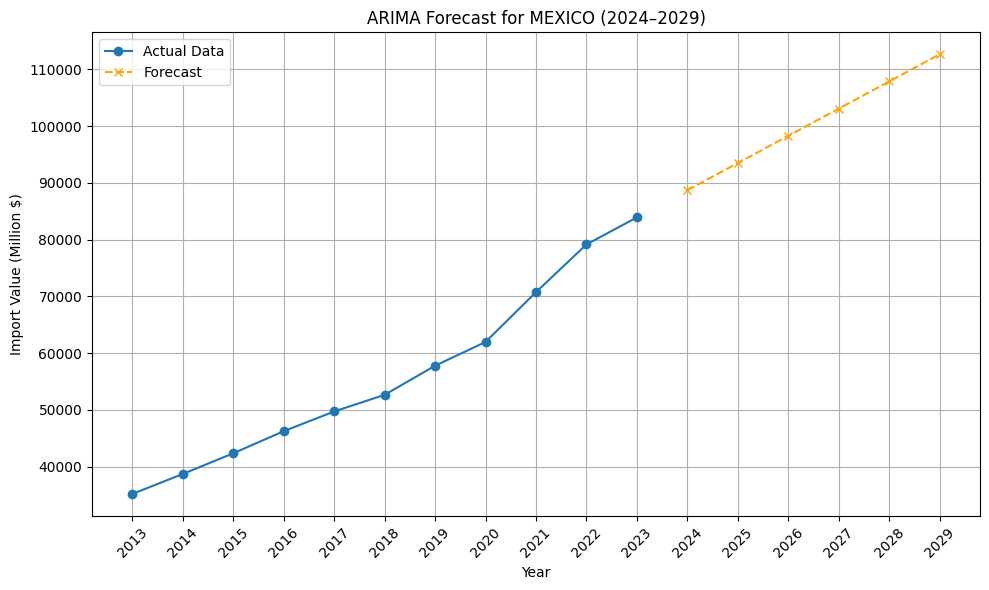

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


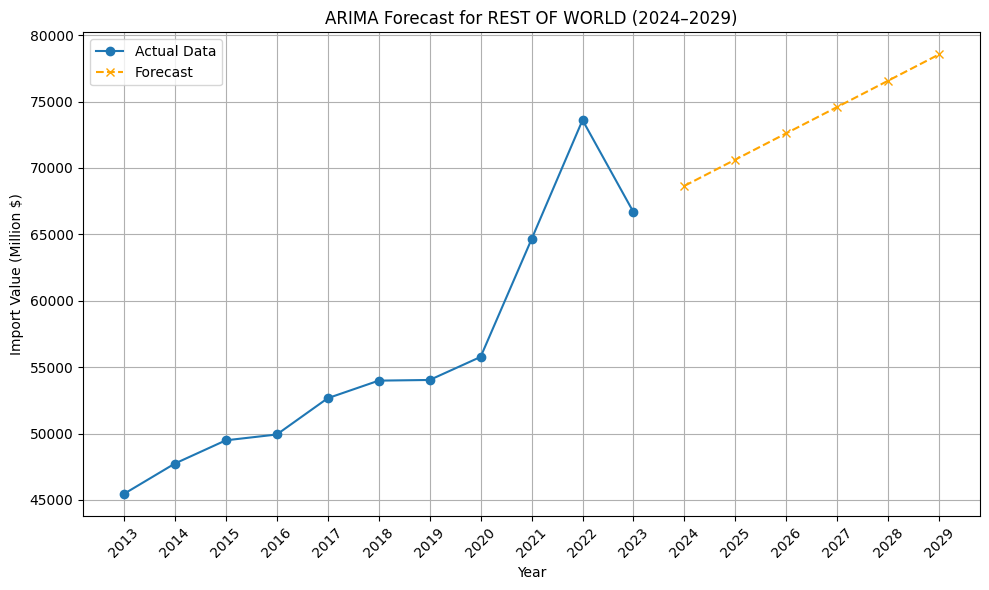

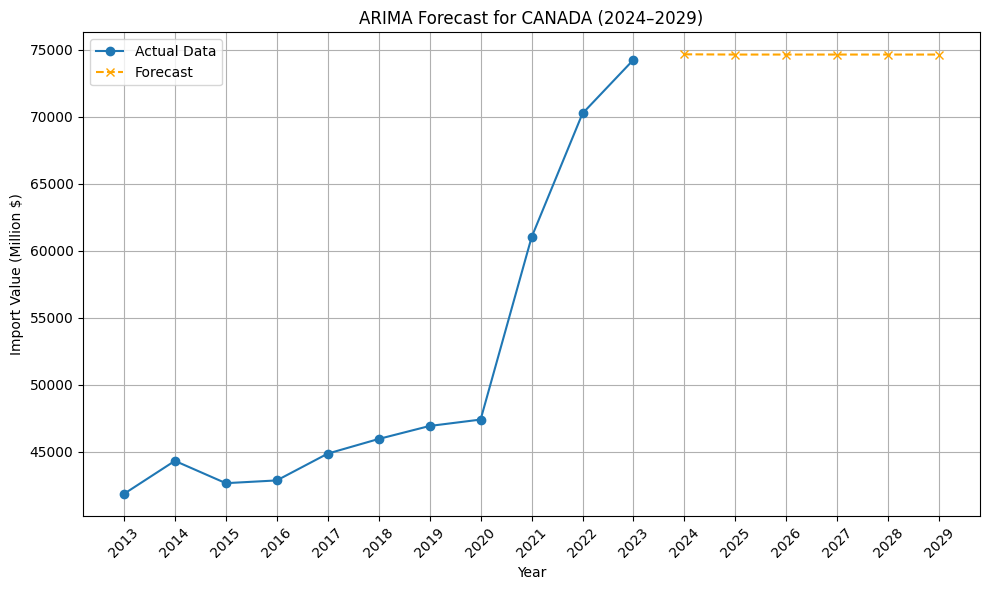

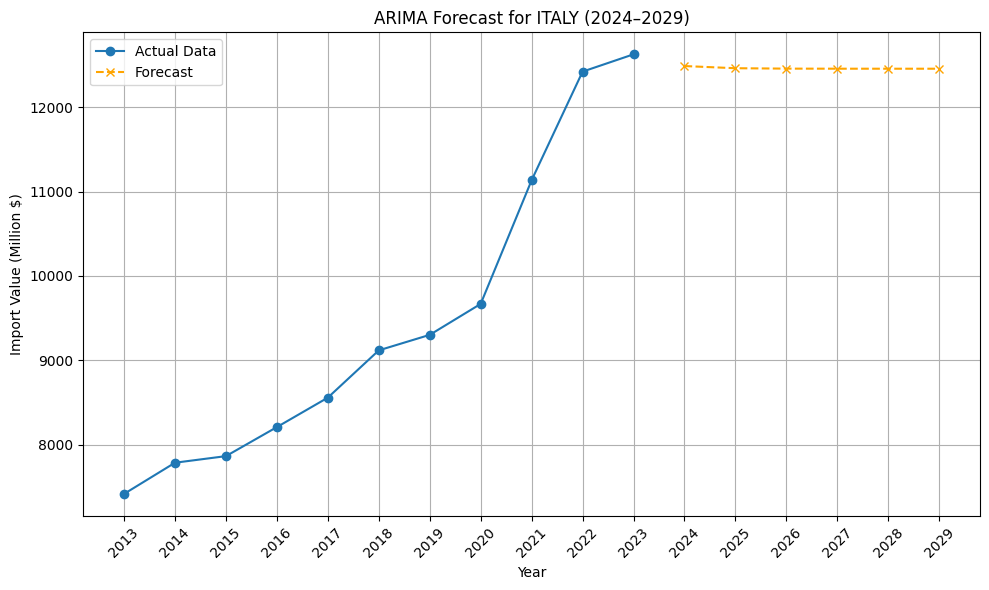

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


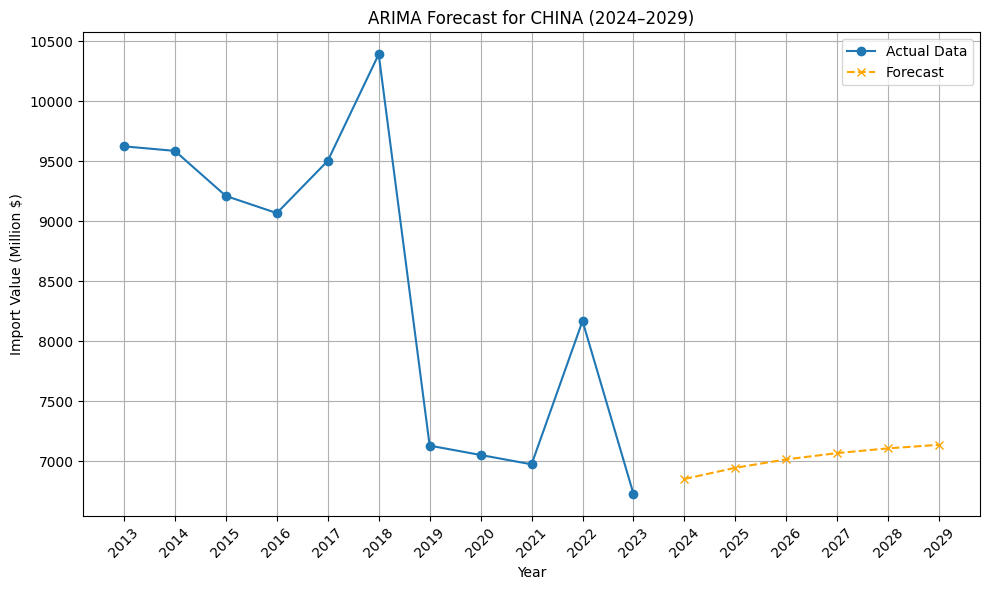


Forecasted Import Values for Top 5 Countries (2024–2029):
             MEXICO  REST OF WORLD        CANADA         ITALY        CHINA
2024   88716.422124   68650.651063  74643.765069  12488.405496  6851.157167
2025   93505.153258   70631.600814  74625.435687  12462.623666  6944.521677
2026   98293.693411   72612.549253  74626.268389  12457.844881  7014.561288
2027  103082.042588   74593.496379  74626.230560  12456.959110  7067.103172
2028  107870.200799   76574.442192  74626.232278  12456.794929  7106.518717
2029  112658.168051   78555.386693  74626.232200  12456.764497  7136.087228


In [23]:
#CODE for ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

file_path = 'FoodImports.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='latin1')

#Filtering and getting data without certain entries
data['Year Number'] = pd.to_numeric(data['Year Number'], errors='coerce')
filtered_data = data[(data['Year Number'] >= 2013) & (data['Year Number'] <= 2023)]
filtered_data = filtered_data[~filtered_data['Country'].isin(['WORLD', 'WORLD (Quantity)'])]
country_trends = filtered_data.groupby(['Country', 'Year Number'])['Value'].sum().reset_index()

#Top countriws selection
top_countries = country_trends.groupby('Country')['Value'].sum().nlargest(5).index
print("Top 5 Countries:", top_countries)
#The years to be forecasted
forecast_years = [2024, 2025, 2026, 2027, 2028, 2029]
forecasts = {}
aic_bic = {}

# Implementing ARIMA for each country
for country in top_countries:
   #Getting the data for country
    country_data = country_trends[country_trends['Country'] == country]
    country_data = country_data.set_index('Year Number')['Value']
    country_data = country_data.sort_index()

    country_data_reset = country_data.reset_index(drop=True)

    #Fitting the  model
    model = ARIMA(country_data_reset, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting import values for the next 6 years
    forecast = model_fit.forecast(steps=6)
    forecasts[country] = forecast.values

    # Combining actual and forecasted years for plotting
    all_years = list(country_data.index) + forecast_years
    all_values = list(country_data.values) + list(forecast)

    #Visualisation
    plt.figure(figsize=(10, 6))
    plt.plot(country_data.index, country_data, label='Actual Data', marker='o', linestyle='-')
    plt.plot(forecast_years, forecast, label='Forecast', linestyle='--', marker='x', color='orange')
    plt.title(f"ARIMA Forecast for {country} (2024–2029)")
    plt.xlabel("Year")
    plt.ylabel("Import Value (Million $)")
    plt.xticks(all_years, rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

#Printing the values forecasted by the model for understanding
forecast_df = pd.DataFrame(forecasts, index=forecast_years)
print("\nForecasted Import Values for Top 5 Countries (2024–2029):")
print(forecast_df)



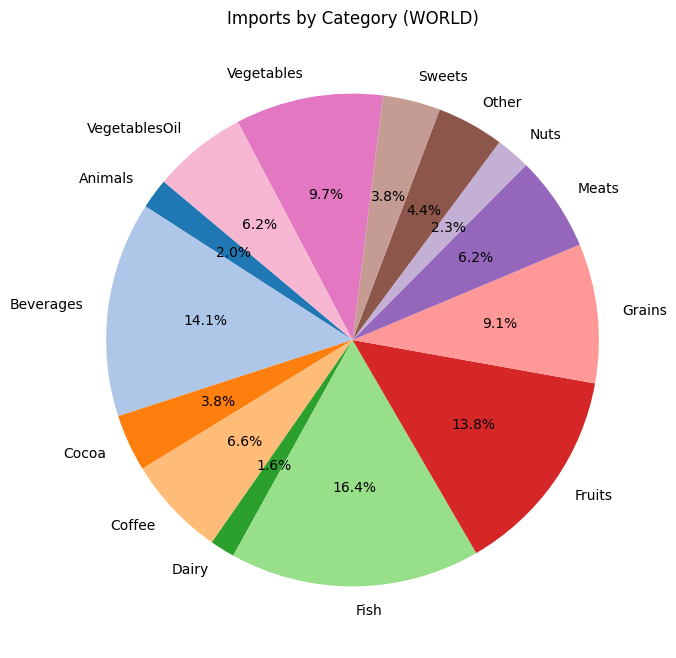

In [24]:
#CODE for pie chart
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'FoodImports.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Filter data for 'WORLD' and exclude 'Food dollars' and 'Prices'
world_imports = data[(data['Country'] == 'WORLD') & 
                     (data['Category'] != 'Food dollars') & 
                     (data['Category'] != 'Prices')]

# Group by Category and calculate total imports
world_imports_by_category = world_imports.groupby('Category')['Value'].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(world_imports_by_category['Value'], labels=world_imports_by_category['Category'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Imports by Category (WORLD)")
plt.show()


Yearly Import Values for REST OF WORLD (2013-2023):
Year Number
2013    45456.9
2014    47743.6
2015    49492.0
2016    49930.7
2017    52664.2
2018    53986.0
2019    54036.3
2020    55772.6
2021    64639.5
2022    73601.8
2023    66669.7
Name: Value, dtype: float64


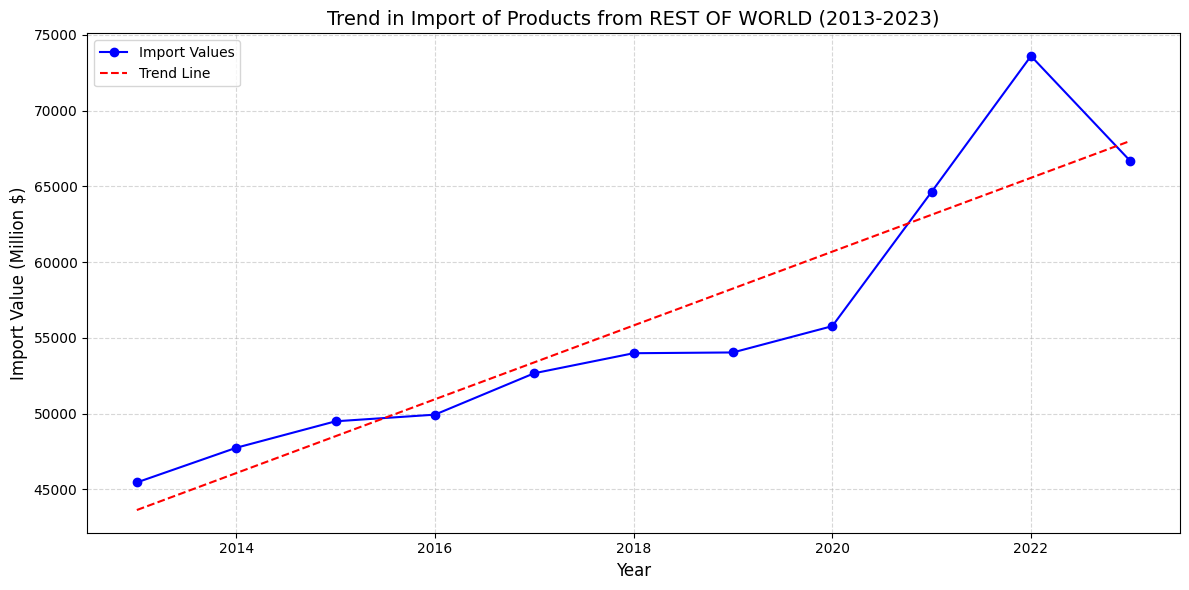

In [25]:
# Trend analysis for the entry -"Rest Of World"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'FoodImports.csv' 
data = pd.read_csv(file_path, encoding='Latin1')

country_name = 'REST OF WORLD'  
start_year, end_year = 2013, 2023 

# Filtering data for the country, excluding 'food volume' and 'food dollar'
country_data = data[
    (data['Country'].str.upper() == country_name) &
    (~data['Commodity'].str.contains('food volume', case=False)) &
    (~data['Commodity'].str.contains('food dollar', case=False))
].copy()  

country_data['Year Number'] = pd.to_numeric(country_data['Year Number'], errors='coerce')
filtered_data = country_data[(country_data['Year Number'] >= start_year) & 
                             (country_data['Year Number'] <= end_year)]

country_trend = filtered_data.groupby('Year Number')['Value'].sum().dropna()

x = country_trend.index  
y = country_trend.values  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)


trendline_y = p(x)


print(f"Yearly Import Values for {country_name} (2013-2023):")
print(country_trend)

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(x, y, marker='o', linestyle='-', label='Import Values', color='blue')

plt.plot(x, trendline_y, 'r--', label='Trend Line')  # Dashed red line


plt.title(f'Trend in Import of Products from {country_name} (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (Million $)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Yearly Import Values for MEXICO (2013-2023):
Year Number
2013    35205.1
2014    38720.2
2015    42370.1
2016    46258.2
2017    49735.4
2018    52665.3
2019    57792.7
2020    61982.7
2021    70759.4
2022    79156.4
2023    83927.5
Name: Value, dtype: float64


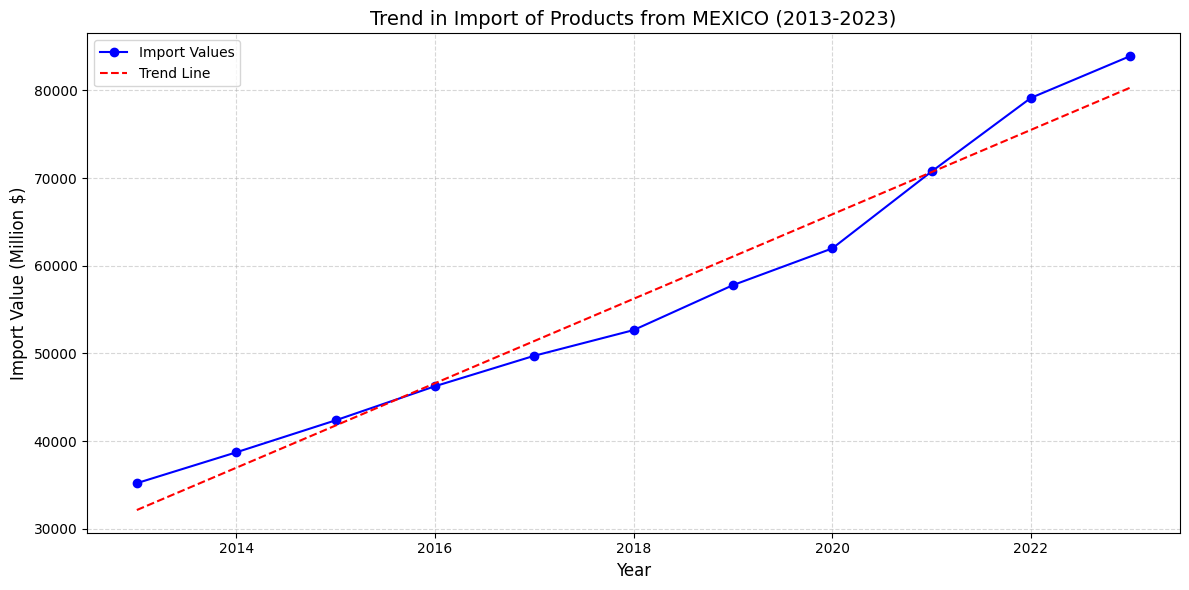

In [26]:
# Trend analysis for MEXICO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'FoodImports.csv' 
data = pd.read_csv(file_path, encoding='Latin1')

country_name = 'MEXICO'  
start_year, end_year = 2013, 2023 

# Filtering data for the country, excluding 'food volume' and 'food dollar'
country_data = data[
    (data['Country'].str.upper() == country_name) &
    (~data['Commodity'].str.contains('food volume', case=False)) &
    (~data['Commodity'].str.contains('food dollar', case=False))
].copy()  

country_data['Year Number'] = pd.to_numeric(country_data['Year Number'], errors='coerce')
filtered_data = country_data[(country_data['Year Number'] >= start_year) & 
                             (country_data['Year Number'] <= end_year)]

country_trend = filtered_data.groupby('Year Number')['Value'].sum().dropna()

x = country_trend.index  
y = country_trend.values  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)


trendline_y = p(x)


print(f"Yearly Import Values for {country_name} (2013-2023):")
print(country_trend)

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(x, y, marker='o', linestyle='-', label='Import Values', color='blue')

plt.plot(x, trendline_y, 'r--', label='Trend Line')  # Dashed red line


plt.title(f'Trend in Import of Products from {country_name} (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (Million $)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Yearly Import Values for CANADA (2013-2023):
Year Number
2013    41867.4
2014    44331.7
2015    42668.4
2016    42873.8
2017    44873.1
2018    45965.1
2019    46934.2
2020    47410.7
2021    61002.1
2022    70236.6
2023    74240.3
Name: Value, dtype: float64


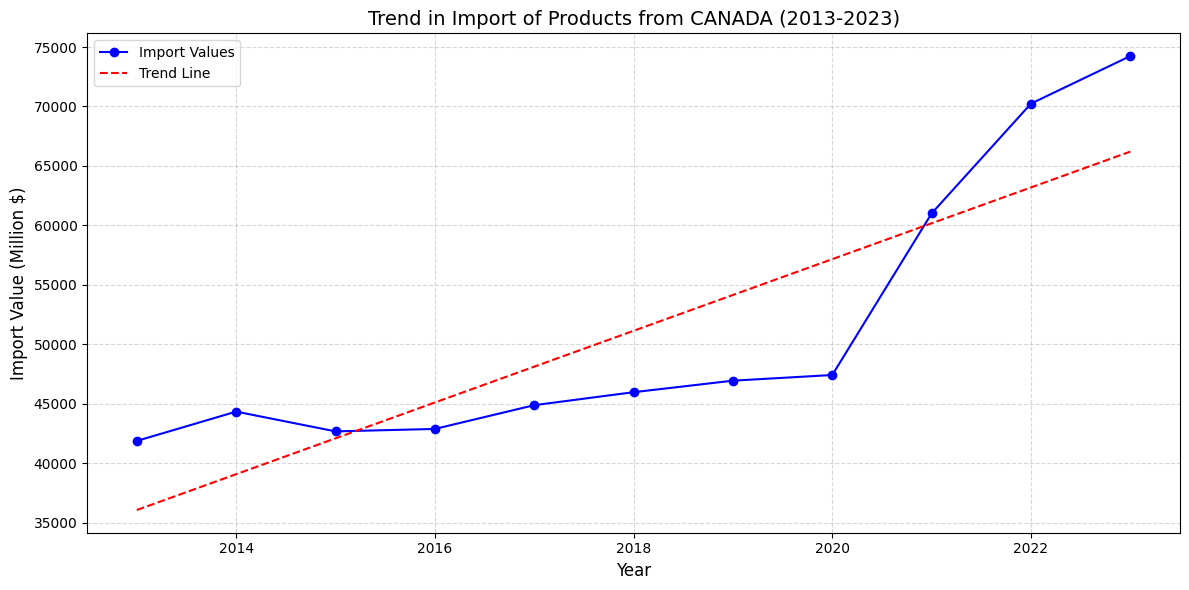

In [27]:
# Trend analysis for the CANADA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'FoodImports.csv' 
data = pd.read_csv(file_path, encoding='Latin1')

country_name = 'CANADA'  
start_year, end_year = 2013, 2023 

# Filtering data for the country, excluding 'food volume' and 'food dollar'
country_data = data[
    (data['Country'].str.upper() == country_name) &
    (~data['Commodity'].str.contains('food volume', case=False)) &
    (~data['Commodity'].str.contains('food dollar', case=False))
].copy()  

country_data['Year Number'] = pd.to_numeric(country_data['Year Number'], errors='coerce')
filtered_data = country_data[(country_data['Year Number'] >= start_year) & 
                             (country_data['Year Number'] <= end_year)]

country_trend = filtered_data.groupby('Year Number')['Value'].sum().dropna()

x = country_trend.index  
y = country_trend.values  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)


trendline_y = p(x)


print(f"Yearly Import Values for {country_name} (2013-2023):")
print(country_trend)

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(x, y, marker='o', linestyle='-', label='Import Values', color='blue')

plt.plot(x, trendline_y, 'r--', label='Trend Line')  # Dashed red line


plt.title(f'Trend in Import of Products from {country_name} (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (Million $)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Yearly Import Values for ITALY (2013-2023):
Year Number
2013     7416.4
2014     7786.2
2015     7864.3
2016     8208.6
2017     8557.6
2018     9118.2
2019     9301.9
2020     9668.9
2021    11134.9
2022    12422.3
2023    12627.5
Name: Value, dtype: float64


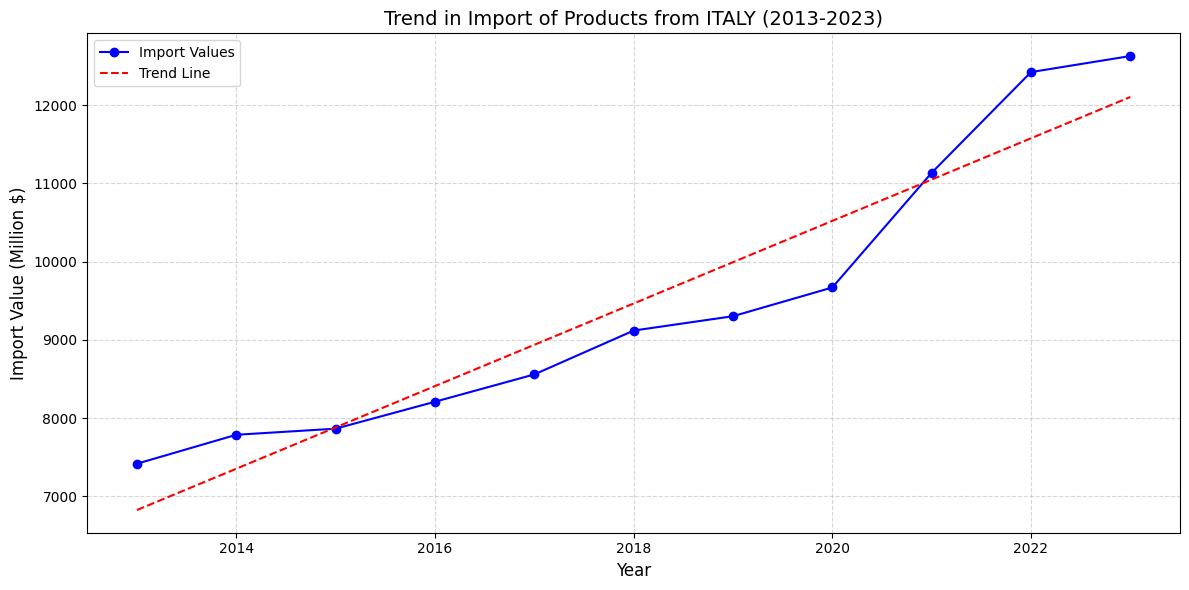

In [28]:
# Trend analysis for the ITALY
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'FoodImports.csv' 
data = pd.read_csv(file_path, encoding='Latin1')

country_name = 'ITALY'  
start_year, end_year = 2013, 2023 

# Filtering data for the country, excluding 'food volume' and 'food dollar'
country_data = data[
    (data['Country'].str.upper() == country_name) &
    (~data['Commodity'].str.contains('food volume', case=False)) &
    (~data['Commodity'].str.contains('food dollar', case=False))
].copy()  

country_data['Year Number'] = pd.to_numeric(country_data['Year Number'], errors='coerce')
filtered_data = country_data[(country_data['Year Number'] >= start_year) & 
                             (country_data['Year Number'] <= end_year)]

country_trend = filtered_data.groupby('Year Number')['Value'].sum().dropna()

x = country_trend.index  
y = country_trend.values  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)


trendline_y = p(x)


print(f"Yearly Import Values for {country_name} (2013-2023):")
print(country_trend)

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(x, y, marker='o', linestyle='-', label='Import Values', color='blue')

plt.plot(x, trendline_y, 'r--', label='Trend Line')  # Dashed red line


plt.title(f'Trend in Import of Products from {country_name} (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (Million $)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Yearly Import Values for CHINA (2013-2023):
Year Number
2013     9623.0
2014     9585.1
2015     9209.8
2016     9066.5
2017     9501.8
2018    10389.8
2019     7129.1
2020     7051.1
2021     6973.3
2022     8167.6
2023     6726.7
Name: Value, dtype: float64


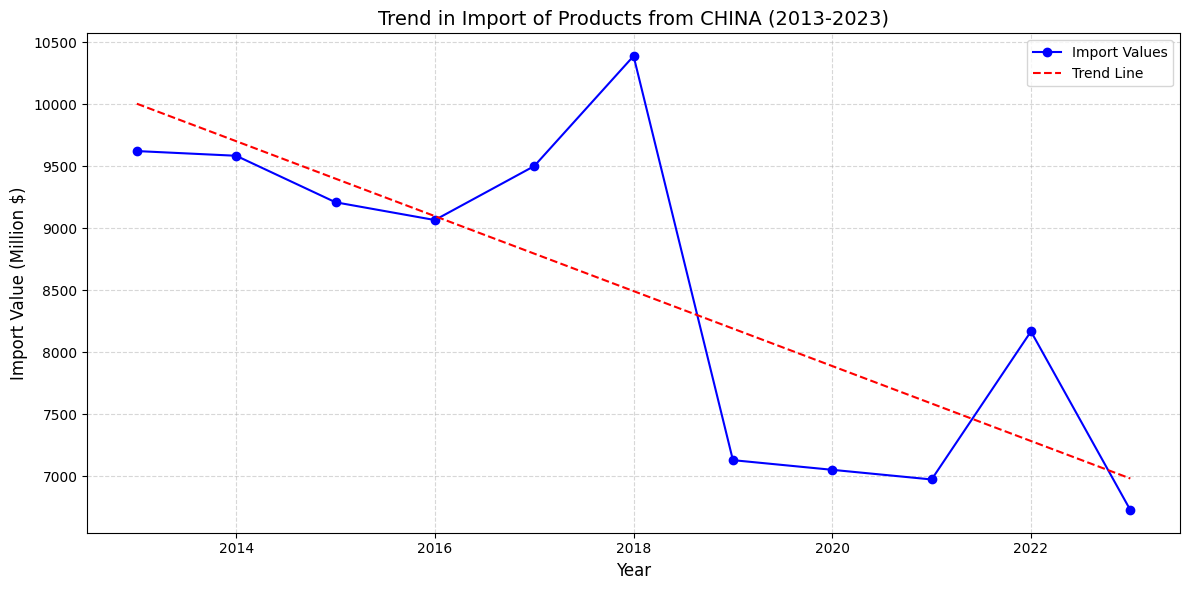

In [29]:
# Trend analysis for CHINA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'FoodImports.csv' 
data = pd.read_csv(file_path, encoding='Latin1')

country_name = 'CHINA'  
start_year, end_year = 2013, 2023 

# Filtering data for the country, excluding 'food volume' and 'food dollar'
country_data = data[
    (data['Country'].str.upper() == country_name) &
    (~data['Commodity'].str.contains('food volume', case=False)) &
    (~data['Commodity'].str.contains('food dollar', case=False))
].copy()  

country_data['Year Number'] = pd.to_numeric(country_data['Year Number'], errors='coerce')
filtered_data = country_data[(country_data['Year Number'] >= start_year) & 
                             (country_data['Year Number'] <= end_year)]

country_trend = filtered_data.groupby('Year Number')['Value'].sum().dropna()

x = country_trend.index  
y = country_trend.values  


z = np.polyfit(x, y, 1)
p = np.poly1d(z)


trendline_y = p(x)


print(f"Yearly Import Values for {country_name} (2013-2023):")
print(country_trend)

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(x, y, marker='o', linestyle='-', label='Import Values', color='blue')

plt.plot(x, trendline_y, 'r--', label='Trend Line')  # Dashed red line


plt.title(f'Trend in Import of Products from {country_name} (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Import Value (Million $)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
